In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
#Read the csv file
data_frame = pd.read_csv("diabetes.csv")
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Splitting the data into X and Y
X = data_frame.drop("Outcome", axis=1)
Y = data_frame.Outcome

In [11]:
#Splitting the data into Train, Validate and Split
#Train= 60%
#Validate= 20%
#Test = 20%
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, Y, train_size=0.6, random_state=50)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_remaining,Y_remaining,train_size=0.5,random_state=50)

In [12]:
#Convert train, test and validate data to nd.arrays to remove column headings and then reshape
X_train = X_train.values
X_test = X_test.values
Y_train= Y_train.values
Y_test= Y_test.values
Y_validate= Y_validate.values
X_validate= X_validate.values


In [13]:
#Normalise the data using Preprocessing Normalisation in Pandas
#Use the mean and Std approach for Normalising the data
X_train_mean = np.array(np.mean(X_train, axis=0))
X_train_mean = X_train_mean.reshape(1, X_train.shape[1])
print(X_train_mean.shape)

X_train_std = np.array(np.std(X_train, axis = 0)).reshape(1, X_train.shape[1])
print(X_train_std.shape)


(1, 8)
(1, 8)


In [14]:
X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std
X_validate = (X_validate - X_train_mean)/X_train_std

In [15]:
#Reshape the data so that we can do dot product in the cost function
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

X_validate = X_validate.T
Y_validate = Y_validate.reshape(1, X_validate.shape[1])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_validate.shape)
print(Y_validate.shape)

(8, 460)
(1, 460)
(8, 154)
(1, 154)
(8, 154)
(1, 154)


In [16]:
#Defining the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [17]:
#Cost function
def cost_func(m, Y, A):
    return -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

In [18]:
#Gradient descent function 
def gradient_descent(m, Y, X, A):
    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A - Y)
    return dW, dB

In [34]:
# Z function
def z_function(weights, X, bias):
    return np.dot(weights.T, X) + bias
    

In [35]:
def logistic_regression(X, Y, alpha, epoch):
    
    m = X.shape[1]
    n = X.shape[0]
    
    #Initialising weights with 0
    weights = np.zeros((n,1))
    bias = 0
    loss_vectors = []
    
    for i in range(epoch):
        
        Z = z_function(weights, X, bias)
        activation = sigmoid(Z)        
        # cost function
        cost = cost_func(m, Y, activation)
        
        # Gradient Descent
        dW, dB = gradient_descent(m, Y,X, activation)
        
        weights = weights - alpha*dW.T
        bias = bias - alpha*dB
        
        # Keeping track of our cost function value
        loss_vectors.append(cost)
        
        if(i%(epoch/100) == 0):
            print("iteration: ",i, ": Cost:", cost)
        
    return weights, bias, loss_vectors

In [36]:
epoch = 100000
alpha = 0.0005

In [37]:
weights_train, bias_train, cost_train = logistic_regression(X_train, Y_train, alpha = alpha, epoch = epoch)

iteration:  0 : Cost: 0.6931471805599452
iteration:  1000 : Cost: 0.6384973178832423
iteration:  2000 : Cost: 0.6008484588913128
iteration:  3000 : Cost: 0.5739088239479756
iteration:  4000 : Cost: 0.5539105539163024
iteration:  5000 : Cost: 0.5385862424434839
iteration:  6000 : Cost: 0.5265303249456788
iteration:  7000 : Cost: 0.5168391323957735
iteration:  8000 : Cost: 0.5089102451355082
iteration:  9000 : Cost: 0.5023283822981706
iteration:  10000 : Cost: 0.4967985197075398
iteration:  11000 : Cost: 0.4921054011225183
iteration:  12000 : Cost: 0.48808824237752907
iteration:  13000 : Cost: 0.4846244518719949
iteration:  14000 : Cost: 0.4816188617875991
iteration:  15000 : Cost: 0.4789964220628894
iteration:  16000 : Cost: 0.4766971271501871
iteration:  17000 : Cost: 0.47467241738555105
iteration:  18000 : Cost: 0.4728825761389688
iteration:  19000 : Cost: 0.47129481340688506
iteration:  20000 : Cost: 0.46988183174247494
iteration:  21000 : Cost: 0.4686207371701533
iteration:  22000 :

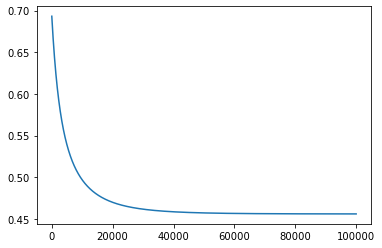

In [38]:
plt.plot(np.arange(epoch), cost_train)
plt.show()

In [39]:
weights_test, bias_test, cost_test = logistic_regression(X_test, Y_test, alpha = alpha, epoch = epoch)

iteration:  0 : Cost: 0.6931471805599454
iteration:  1000 : Cost: 0.6386765713775915
iteration:  2000 : Cost: 0.6017706617471729
iteration:  3000 : Cost: 0.5759756526539288
iteration:  4000 : Cost: 0.5573319854676496
iteration:  5000 : Cost: 0.5434217692006352
iteration:  6000 : Cost: 0.5327404154130361
iteration:  7000 : Cost: 0.5243261642318177
iteration:  8000 : Cost: 0.5175466522818907
iteration:  9000 : Cost: 0.5119747353273252
iteration:  10000 : Cost: 0.5073146293052648
iteration:  11000 : Cost: 0.5033568304813749
iteration:  12000 : Cost: 0.49994987385261835
iteration:  13000 : Cost: 0.4969821947137511
iteration:  14000 : Cost: 0.49437020656792
iteration:  15000 : Cost: 0.4920502967709456
iteration:  16000 : Cost: 0.48997334726272357
iteration:  17000 : Cost: 0.48810091690011226
iteration:  18000 : Cost: 0.4864025382509377
iteration:  19000 : Cost: 0.4848537750799612
iteration:  20000 : Cost: 0.48343480746386863
iteration:  21000 : Cost: 0.4821293883131899
iteration:  22000 : C

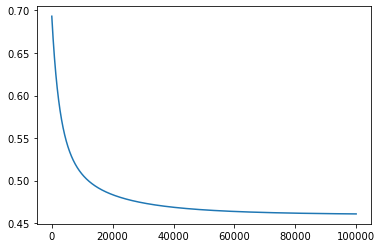

In [40]:
plt.plot(np.arange(epoch), cost_test)
plt.show()

In [41]:
weights_validate, bias_validate, cost_validate = logistic_regression(X_validate, Y_validate, alpha = alpha, epoch = epoch)

iteration:  0 : Cost: 0.6931471805599454
iteration:  1000 : Cost: 0.6364219205819578
iteration:  2000 : Cost: 0.5986380097330398
iteration:  3000 : Cost: 0.5724020293625568
iteration:  4000 : Cost: 0.5534340334586606
iteration:  5000 : Cost: 0.5392317210597543
iteration:  6000 : Cost: 0.5282802831410036
iteration:  7000 : Cost: 0.5196259341095415
iteration:  8000 : Cost: 0.5126452731788069
iteration:  9000 : Cost: 0.5069168610370617
iteration:  10000 : Cost: 0.5021471193559642
iteration:  11000 : Cost: 0.49812603820131407
iteration:  12000 : Cost: 0.49469981508957594
iteration:  13000 : Cost: 0.4917534381166783
iteration:  14000 : Cost: 0.48919929310225657
iteration:  15000 : Cost: 0.4869695249887669
iteration:  16000 : Cost: 0.48501080022571996
iteration:  17000 : Cost: 0.48328064131856574
iteration:  18000 : Cost: 0.4817448132793329
iteration:  19000 : Cost: 0.4803754279540079
iteration:  20000 : Cost: 0.47914954728172426
iteration:  21000 : Cost: 0.47804813920436695
iteration:  2200

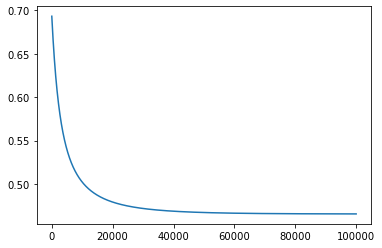

In [42]:
plt.plot(np.arange(epoch), cost_validate)
plt.show()

In [353]:
print("------------------------------- Cost Comparisons -----------------------------------")

------------------------------- Cost Comparisons -----------------------------------


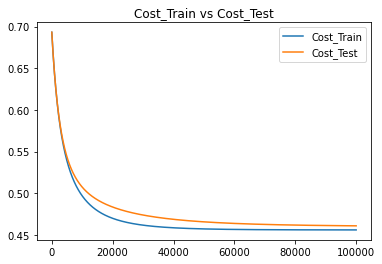

In [43]:
plt.title('Cost_Train vs Cost_Test')
plt.plot(np.arange(epoch), cost_train, label='Cost_Train')
plt.plot(np.arange(epoch), cost_test, label='Cost_Test')
plt.legend(loc='upper right')
plt.show()

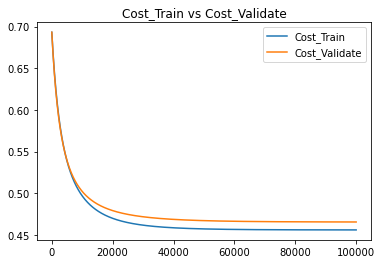

In [44]:
plt.title('Cost_Train vs Cost_Validate')
plt.plot(np.arange(epoch), cost_train, label='Cost_Train')
plt.plot(np.arange(epoch), cost_validate, label='Cost_Validate')
plt.legend(loc='upper right')
plt.show()

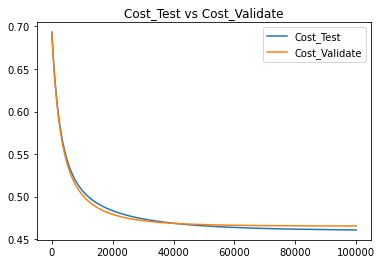

In [45]:
plt.title('Cost_Test vs Cost_Validate')
plt.plot(np.arange(epoch), cost_test, label='Cost_Test')
plt.plot(np.arange(epoch), cost_validate, label='Cost_Validate')
plt.legend(loc='upper right')
plt.show()

In [46]:
def accuracy_computation(activation, Y):
    return (1 - np.sum(np.absolute(activation - Y))/Y.shape[1])*100

In [47]:
threshold = 0.5
def find_accuracy(X, Y, weights, bias):
    m = X.shape[1]
    Z = z_function(weights, X, bias)
    activation = sigmoid(Z)    
    cost = cost_func(m, Y, activation)  
    activation = activation > threshold  
    activation = np.array(activation, dtype = 'int64')  
    acc = accuracy_computation(activation, Y)
    return cost, acc

In [48]:
def accuracy_vectors(X, Y, weights, bias):
    accuracy_vectors = []
    for i in range(epoch):
        m = X.shape[1]
        Z = z_function(weights, X, bias)
        activation = sigmoid(Z)    
        cost = cost_func(m, Y, activation)  
        activation = activation > threshold  
        activation = np.array(activation, dtype = 'int64')  
        acc = accuracy_computation(activation, Y)
        accuracy_vectors.append(acc)
    return accuracy_vectors

In [49]:
accuracy_vectors_train = accuracy_vectors(X_train, Y_train, weights_train, bias_train)
accuracy_vectors_test = accuracy_vectors(X_test, Y_test, weights_test, bias_test)
accuracy_vectors_validate = accuracy_vectors(X_validate, Y_validate, weights_validate, bias_validate)


In [50]:
#plt.plot(np.arange(accuracy_vectors_test), accuracy_vectors_train)
#plt.show()

In [55]:
cost_train, accuracy_train = find_accuracy(X_train, Y_train, weights_train, bias_train)
cost_test, accuracy_test = find_accuracy(X_test, Y_test, weights_test, bias_test)
cost_validate, accuracy_validate = find_accuracy(X_train, Y_train, weights_validate, bias_validate)

In [56]:
find_accuracy(X_train, Y_train, weights_train, bias_train)
print(cost_train,accuracy_train )

0.4559982574617298 79.56521739130434


In [57]:
find_accuracy(X_validate, Y_validate, weights_validate, bias_validate)
print(cost_validate,accuracy_validate )

0.4843011718188546 77.82608695652173


In [58]:
find_accuracy(X_test, Y_test, weights_test, bias_test)
print(cost_test,accuracy_test )

0.4609020035917517 78.57142857142857
